In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy as sp
from scipy.interpolate import interp1d
from datetime import datetime

# Load Temperature-Resistance Table

In [3]:
table = np.loadtxt("therm44008_table.txt")
tempfun = sp.interpolate.interp1d(table[:,1], table[:,0], kind='cubic')

In [4]:
test_ohms = np.linspace(884.6,0.6,1000)
plt.plot(test_ohms, tempfun(test_ohms))
plt.xlabel("Thermistor Resistance [kOhm]")
plt.ylabel("Temperature [C]");

# Analyze FW=2047 Data

In [32]:
data = np.loadtxt("data_adc_filter2047.txt")

Text(0.5, 0, 'Time since start [s]')

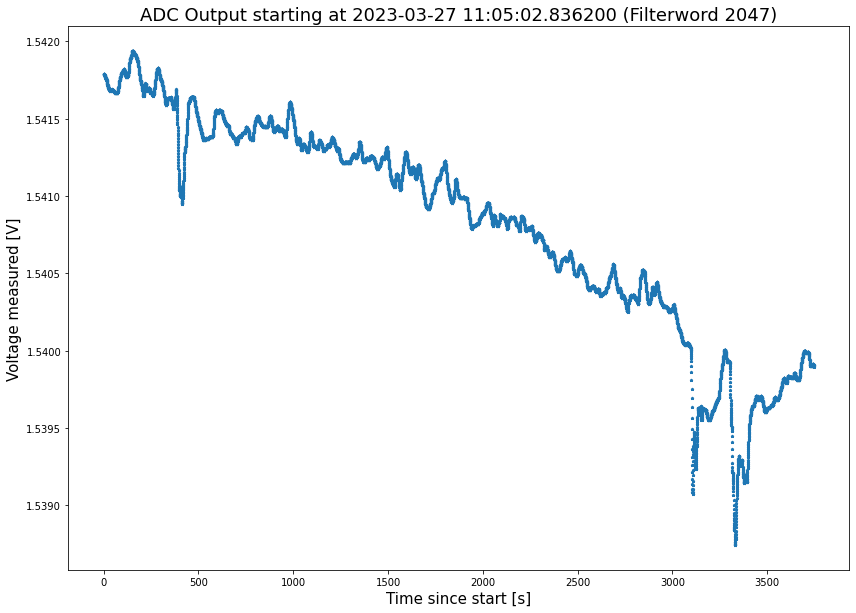

In [39]:
fig,ax = plt.subplots(figsize=(14,10))
dt_obj = datetime.fromtimestamp(data[0,0])
ax.plot(data[:,0]-data[0,0], data[:,1], '*', ms=3)
ax.set_title(f"ADC Output starting at {dt_obj} (Filterword 2047)", fontsize=18)
ax.set_ylabel("Voltage measured [V]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

In [5]:
def volt_to_kohm(volt):
    return 20 * volt / (2.5 - volt)

In [35]:
kohms = [volt_to_kohm(v) for v in data[:,1]]

In [36]:
temps = [tempfun(kohm) for kohm in kohms]

In [38]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(data[:,0]-data[0,0], temps, c='g')
ax.set_title(f"ADC Output Temperature starting at {dt_obj} (Filterword 2047)", fontsize=18)
ax.set_ylabel("Temperature Measured [°C]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

Text(0.5, 0, 'Time since start [s]')

# Analyze FW=1 Data

In [123]:
data = np.loadtxt("data_adc_filter1.txt")
print(f"Loaded {len(data)} Datapoints")

Loaded 600000 Datapoints


In [124]:
fig,ax = plt.subplots(figsize=(14,10))
dt_obj = datetime.fromtimestamp(data[0,0])
ax.plot(data[:,0]-data[0,0], data[:,1], '*', ms=3)
ax.set_title(f"ADC Output starting at {dt_obj} (Filterword 0001)", fontsize=18)
ax.set_ylabel("Voltage measured [V]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

Text(0.5, 0, 'Time since start [s]')

In [125]:
kohms = [volt_to_kohm(v) for v in data[:,1]]
temps = [tempfun(kohm) for kohm in kohms]

Text(0.5, 0, 'Time since start [s]')

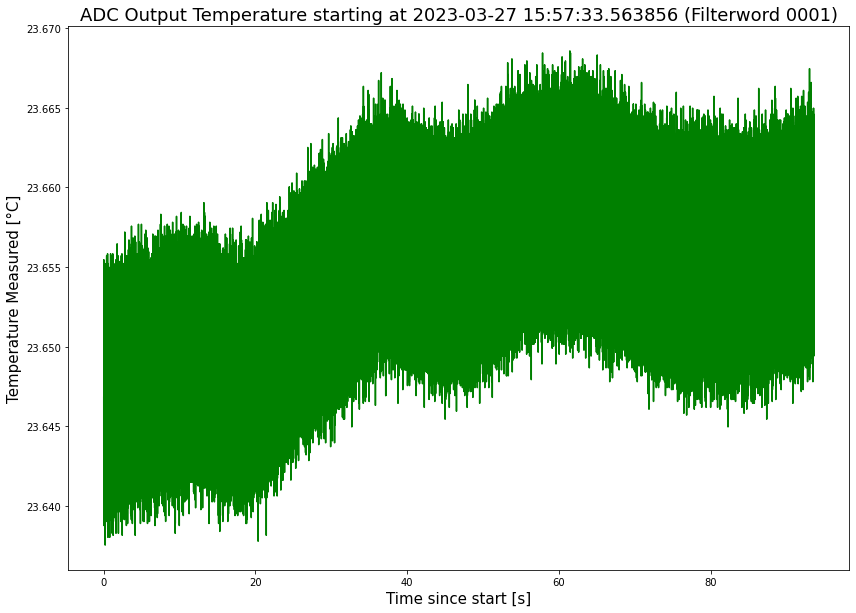

In [126]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(data[:,0]-data[0,0], temps[:], c='g')
ax.set_title(f"ADC Output Temperature starting at {dt_obj} (Filterword 0001)", fontsize=18)
ax.set_ylabel("Temperature Measured [°C]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

In [127]:
print(f"Datarate: {10000/(data[9999,0]-data[0,0])}")

Datarate: 6427.470926000561


In [130]:
mean_temp = np.mean(temps)
Trms_arr = temps - mean_temp
Trms_arr = Trms_arr**2
Trms = np.sqrt(np.sum(Trms_arr)/len(Trms_arr))

In [131]:
print(f"Temperature rms: {Trms} °C")

0.004603294350557177


In [132]:
mean_volt = np.mean(data[:,1])
Vrms_arr = data[:,1] - mean_volt
Vrms_arr = Vrms_arr**2
Vrms = np.sqrt(np.sum(Vrms_arr)/len(Vrms_arr))

In [133]:
print(f"Voltage rms: {Vrms} V")

Voltage rms: 0.00011833236217839439 V


# Analyze FW=15 Data

In [73]:
data = np.loadtxt("data_adc_filter1.txt")
print(f"Loaded {len(data)} Datapoints")

Loaded 76800 Datapoints


Text(0.5, 0, 'Time since start [s]')

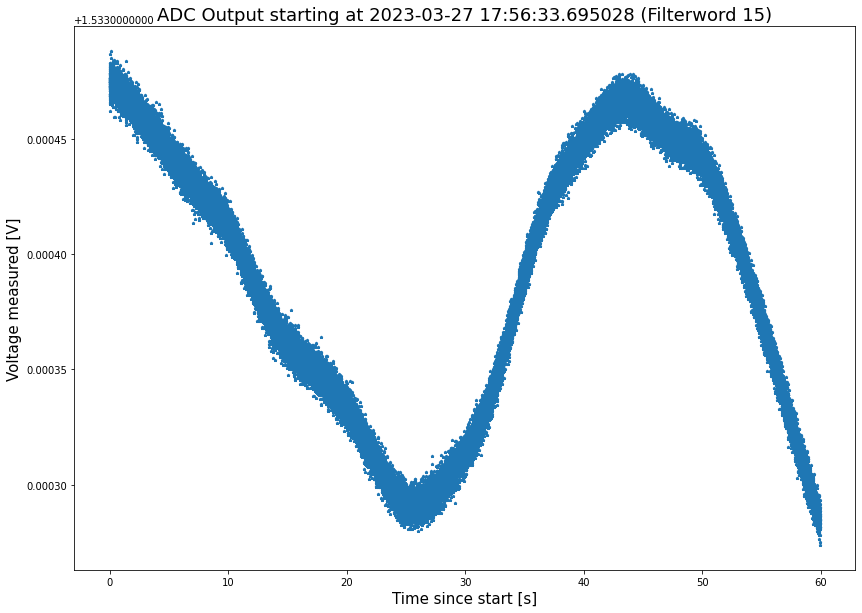

In [74]:
fig,ax = plt.subplots(figsize=(14,10))
dt_obj = datetime.fromtimestamp(data[0,0])
ax.plot(data[:,0]-data[0,0], data[:,1], '*', ms=3)
ax.set_title(f"ADC Output starting at {dt_obj} (Filterword 15)", fontsize=18)
ax.set_ylabel("Voltage measured [V]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

In [75]:
kohms = [volt_to_kohm(v) for v in data[:,1]]
temps = [tempfun(kohm) for kohm in kohms]

In [76]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(data[:,0]-data[0,0], temps[:], c='g')
ax.set_title(f"ADC Output Temperature starting at {dt_obj} (Filterword 15)", fontsize=18)
ax.set_ylabel("Temperature Measured [°C]", fontsize=15)
ax.set_xlabel("Time since start [s]", fontsize=15)

Text(0.5, 0, 'Time since start [s]')

In [77]:
print(f"Datarate: {10000/(data[9999,0]-data[0,0])}")

Datarate: 1282.3855705940766


In [66]:
mean_temp = np.mean(temps)
Trms_arr = temps - mean_temp
Trms_arr = Trms_arr**2
Trms = np.sqrt(np.sum(Trms_arr)/len(Trms_arr))

mean_volt = np.mean(data[:,1])
Vrms_arr = data[:,1] - mean_volt
Vrms_arr = Vrms_arr**2
Vrms = np.sqrt(np.sum(Vrms_arr)/len(Vrms_arr))

In [67]:
print(f"Temperature rms: {Trms} °C")
print(f"Voltage rms: {Vrms} V")

Temperature rms: 0.005258688813951174 °C
Voltage rms: 0.0001351799989419777 V


In [6]:
def rms(SPS, times, volts, temps):
    SPS_int = int(SPS/2)*2
    volts_avs = np.array([np.mean(volts[i:i+SPS_int]) for i in range(0, len(times)-SPS_int)])
    temps_avs = np.array([np.mean(temps[i:i+SPS_int]) for i in range(0, len(times)-SPS_int)])
    Trms_arr = (temps[int(SPS_int/2):-int(SPS_int/2)] - temps_avs)**2
    Vrms_arr = (volts[int(SPS_int/2):-int(SPS_int/2)] - volts_avs)**2
    Trms = np.sqrt(np.sum(Trms_arr)/len(Trms_arr))
    Vrms = np.sqrt(np.sum(Vrms_arr)/len(Vrms_arr))
    
    return Trms, Vrms

In [33]:
def analyze(FW, SPS, versionstr=""):
    data = np.loadtxt(f"data_adc_filter{FW}{versionstr}.txt")
    kohms = [volt_to_kohm(v) for v in data[:,1]]
    temps = [tempfun(kohm) for kohm in kohms]
    print(f"Loaded {len(data)} Datapoints")
    
    TSPS = len(data) / (data[-1,0]-data[0,0])
    print(f"TSPS: {TSPS}")    
    Trms, Vrms = rms(min(SPS,TSPS), data[:,0], data[:,1], temps)
    print(f"V RMS: {Vrms} V")
    print(f"T RMS: {Trms} K")
    
    fig,axs = plt.subplots(2,1,figsize=(14,25))
    dt_obj = datetime.fromtimestamp(data[0,0])
    axs[0].plot(data[:,0]-data[0,0], data[:,1], '*', ms=2)
    axs[0].set_title(f"ADC Output starting at {dt_obj} (Filterword {FW})", fontsize=18)
    axs[0].set_ylabel("Voltage measured [V]", fontsize=15)
    axs[0].set_xlabel("Time since start [s]", fontsize=15)
    textstr = f"TSPS: {TSPS:.5}\nVrms: {Vrms*1000000:.5} uV"
    axs[0].text(0.7, 0.5, textstr, transform=axs[0].transAxes, fontsize=20, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))
    maxy = np.max(data[:,1])
    miny = np.min(data[:,1])
    gridy = np.linspace(miny, maxy, int((maxy-miny)/0.000001), endpoint=True) #1uV spacing
    for y in gridy:
        axs[0].plot([0, data[-1,0]-data[0,0]], [y,y], lw=1, c='gray', alpha=0.3)
    
    axs[1].plot(data[:,0]-data[0,0], temps[:], '*', ms=2, c='g')
    axs[1].set_title(f"ADC Temperature starting at {dt_obj} (Filterword {FW})", fontsize=18)
    axs[1].set_ylabel("Temperature measured [°C]", fontsize=15)
    axs[1].set_xlabel("Time since start [s]", fontsize=15)
    textstr = f"TSPS: {TSPS:.5}\nTrms: {Trms*1000000:.5} uK"
    axs[1].text(0.7, 0.5, textstr, transform=axs[1].transAxes, fontsize=20, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))
    maxy = np.max(temps[:])
    miny = np.min(temps[:])
    gridy = np.linspace(miny, maxy, int((maxy-miny)/0.00003), endpoint=True) #30uK spacing
    for y in gridy:
        axs[1].plot([0, data[-1,0]-data[0,0]], [y,y], lw=1, c='gray', alpha=0.3)    
    plt.show()


Loaded 1000 Datapoints
TSPS: 9.404987865070307
V RMS: 2.2045779981528572e-07 V
T RMS: 8.604394118512754e-06 K


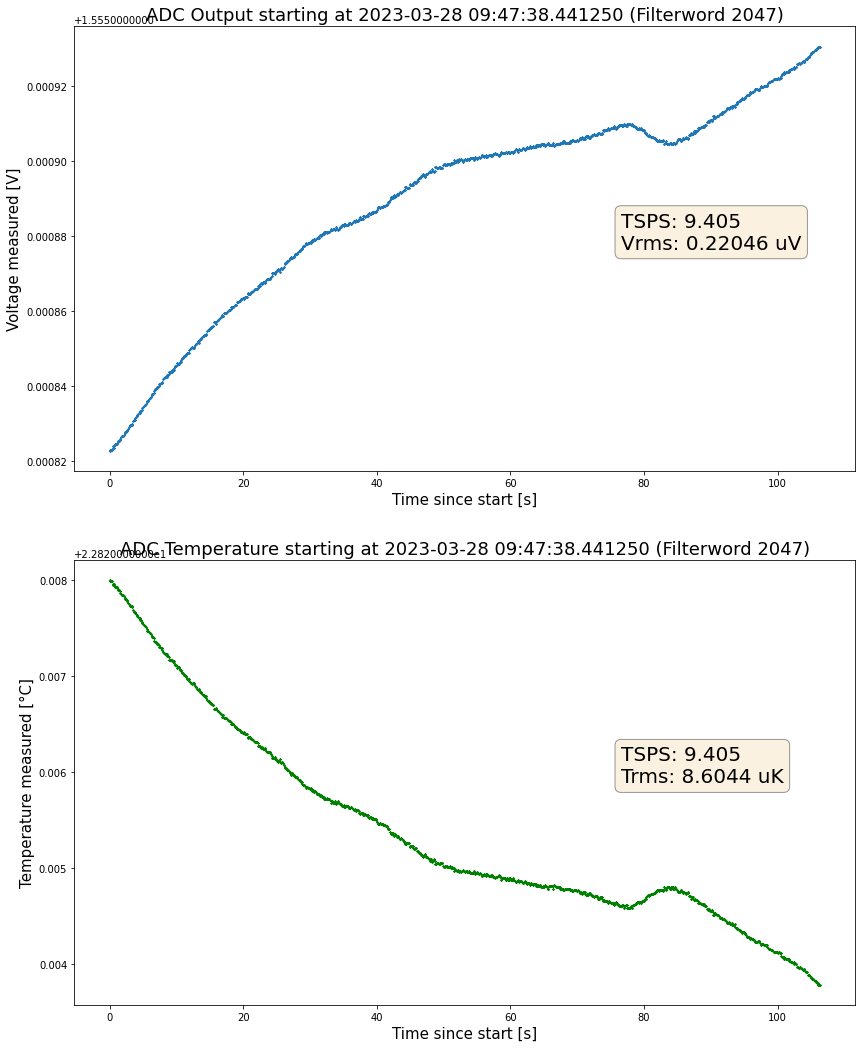

In [153]:
analyze(2047, 10, "_v4")

Loaded 600000 Datapoints
TSPS: 6100.30037317296
V RMS: 7.23246545683871e-05 V
T RMS: 0.0028135025947886813 K


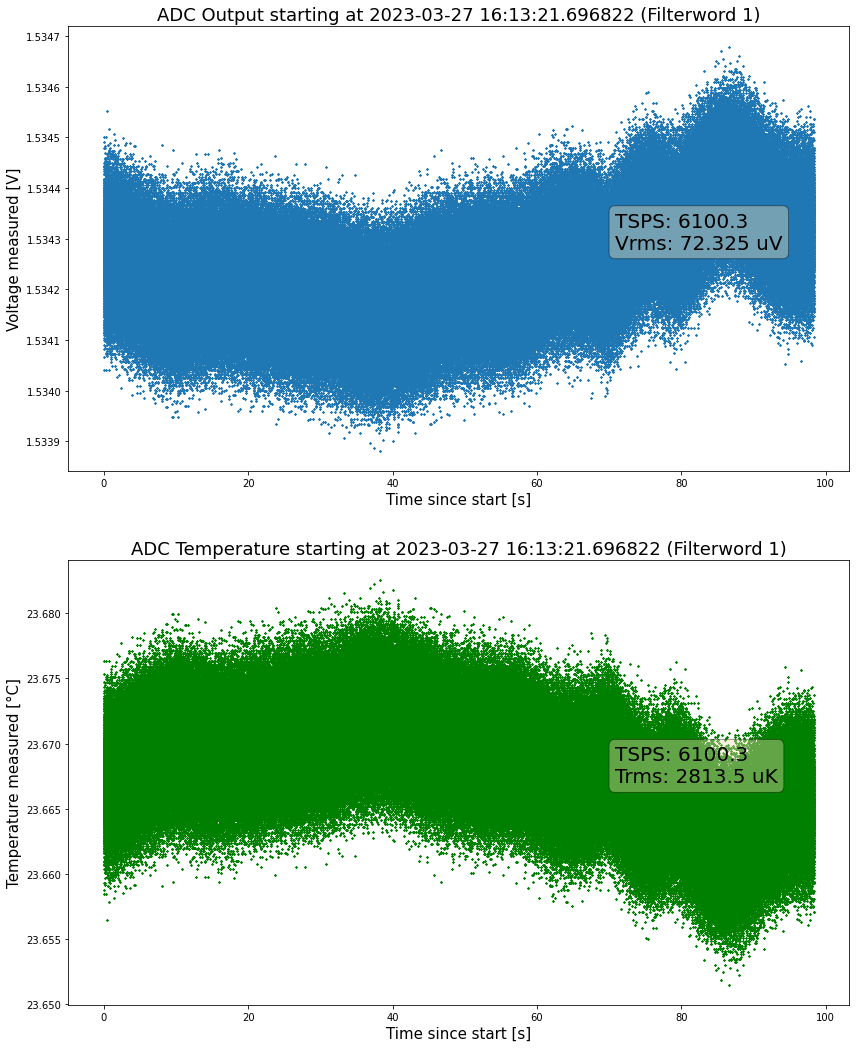

In [154]:
analyze(1, 19200, "_v2")

In [156]:
analyze(4, 4800, "")

Loaded 480000 Datapoints
TSPS: 2134.168128004188
V RMS: 7.963928451050403e-06 V
T RMS: 0.00031081740154527296 K


In [157]:
analyze(120, 160, "_v2")

Loaded 16000 Datapoints
TSPS: 160.24535514552377
V RMS: 1.0739414759323624e-06 V
T RMS: 4.1912674978084535e-05 K


Loaded 128000 Datapoints
TSPS: 1281.9499294709058
V RMS: 3.888892311278621e-06 V
T RMS: 0.00015176421007702086 K


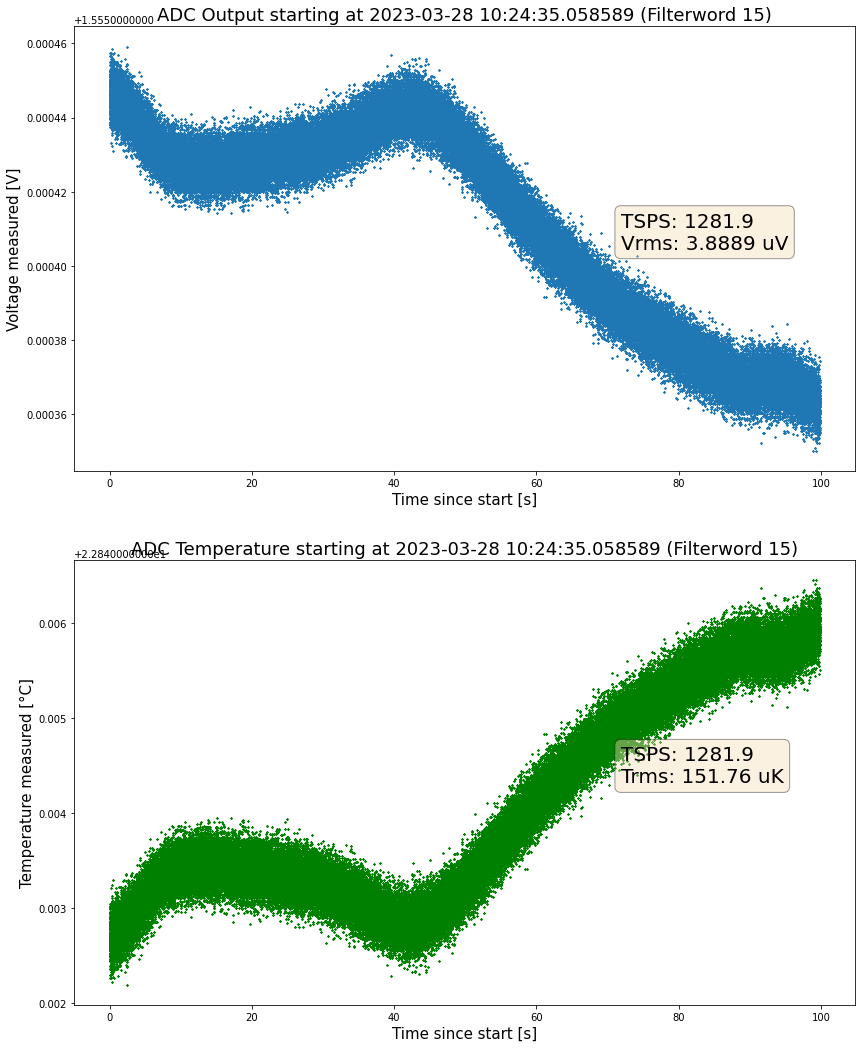

In [158]:
analyze(15, 1280, "_v4")

# NSD

In [178]:
freqs = np.array([9.4, 160, 1281, 4800, 19200])
rms = np.array([8.6, 41.9, 151.8, 311.0, 2813.0])
rms_sq = rms**2
nsd_vals = [np.sqrt((rms_sq[i+1]-rms_sq[i]) / (freqs[i+1] - freqs[i])) for i in [0,1,2,3]]
nsd_vals.append(nsd_vals[-1])
nsdfun = sp.interpolate.interp1d(freqs,nsd_vals , kind='linear')

fs = np.linspace(freqs[0], freqs[-1], 1000)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(fs, nsdfun(fs))
ax.set_ylabel("Spectral Noise Density [uK / sqrt(Hz)]", fontsize=13)
ax.set_xlabel("ADC Output Rate [Hz]", fontsize=13)
ax.set_title("AD7124 SND in Temperature Measurements", fontsize=20)

Text(0.5, 1.0, 'AD7124 SND in Temperature Measurements')

In [172]:
import scipy.integrate as integrate
def nsdfunsq(f):
    return nsdfun(f) * nsdfun(f)
np.sqrt(integrate.quad(nsdfunsq, 10., 1280.))

array([1.56803699e+02, 1.89658983e-02])

In [200]:
%matplotlib inline
analyze(2047, 10, "_v9")

Loaded 514547 Datapoints
TSPS: 9.39057738510173
V RMS: 9.197713987352526e-07 V
T RMS: 3.574941146303733e-05 K


Loaded 27000 Datapoints
TSPS: 9.393437650089531
V RMS: 3.2444770505066825e-07 V
T RMS: 1.2662960264068282e-05 K


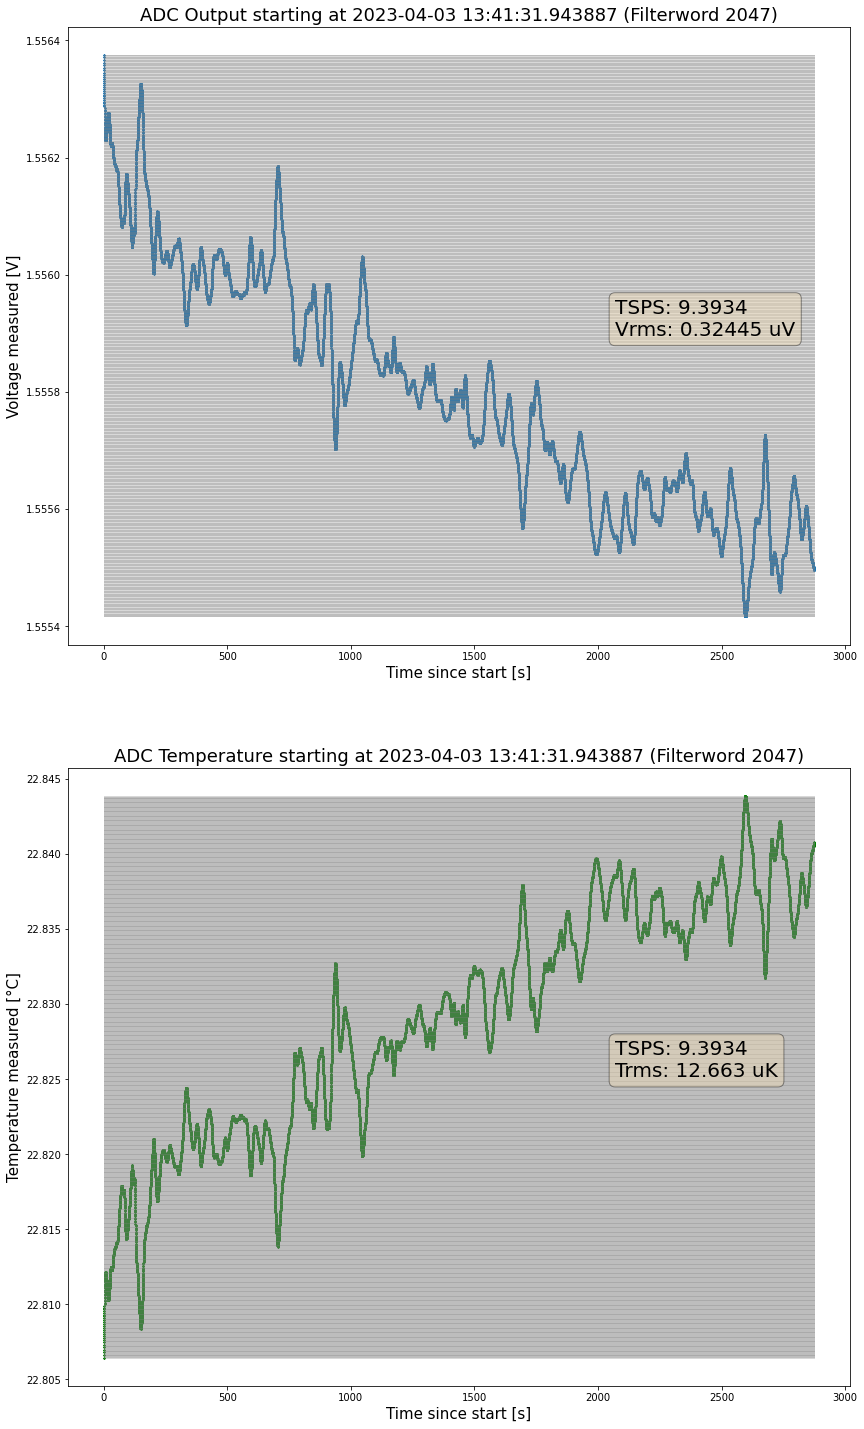

In [35]:
%matplotlib inline
analyze(2047, 10, "_v9")

Loaded 100 Datapoints
TSPS: 9.476972952478821
V RMS: 8.849972884573374e-07 V
T RMS: 3.4493327228426007e-05 K


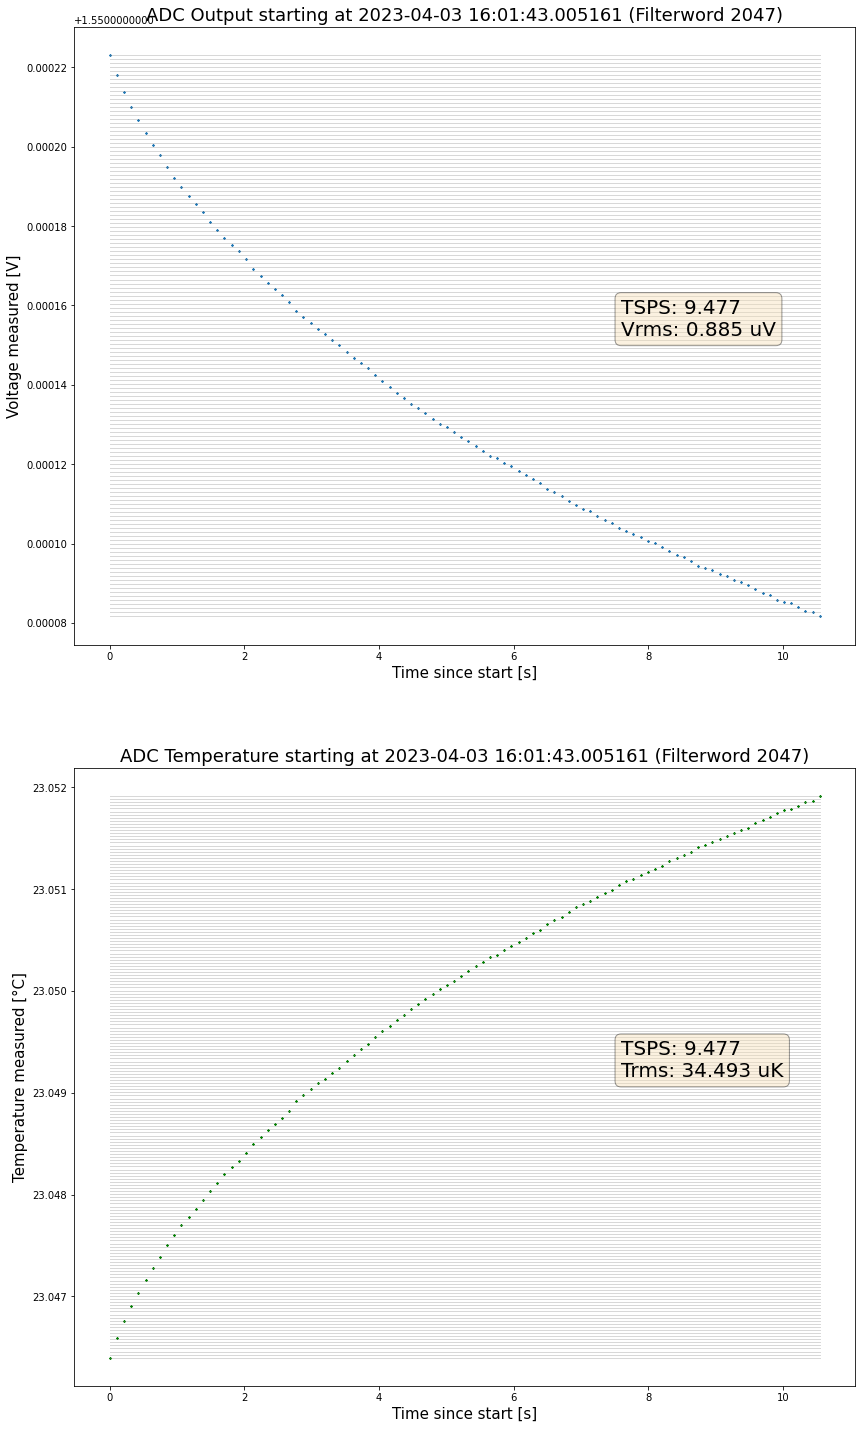

In [36]:
%matplotlib inline
analyze(2047, 10, "_v10")